# SETUP 

### Log in to PPI

`$ ssh -A xvis-m4a.met.no`

### Clone or update this repository

`$ git clone https://github.com/jgliss/pyaerocom-meetings.git`

#### Or (if you have it cloned already)

`$ cd pyaerocom-meetings`  
`$ git pull`


### Activate conda environment that has pyaerocom and dependencies installed

`$ module load aerocom/aerocom-pyaerocom-master`

### Start jupyter

After activating the pyaerocom environment, open jupyter lab using the following command:

`$ jupyter lab --no-browser --ip=$HOSTNAME.met.no`

# Session 1: Working with observation data in pyaerocom

The main purpose of the AeroCom project is to compare model output data with observations. Both the model and the observation datasets are stored on PPI and the data directory of each dataset can be accessed via an *unique ID* for the dataset. These ID's can be a little cryptic sometimes and parts of this tutorial show, how to find the data you search for, regardless whether you know the exact AeroCom ID or not.

For instance, below we are going to work with AERONET Sun photometer data, using the version 2, level 2 daily data product. The corresponding ID for this dataset in pyaerocom is ***AeronetSunV2Lev2.daily***.

### More info about pyaerocom

- Website and code documentation (API): https://pyaerocom.met.no/
- GitHub: https://github.com/metno/pyaerocom

### **Note:** Let us know if you find any issues or have suggestions for improvements

[Create an issue](https://github.com/metno/pyaerocom/issues)

## Part 1: Reading of and investigating Aeronet Sun AODs (version 2, level 2 data)

In [1]:
import pyaerocom as pya

Initating pyaerocom configuration
Checking server configuration ...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.019 s


Check version of pyaerocom:

In [2]:
pya.__version__ #0.8.0.dev14

'0.8.0.dev14'

### Search data ID for Aeronet Sun version 2 level 2, daily data

In [3]:
pya.browse_database('Aeronet*Sun*V2*')

Reading failed for AeronetSunV2Lev1.5.daily. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSunV2Lev1.5.daily',)

Dataset name: AeronetSunV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20180519

Dataset name: AeronetSunV2Lev2.AP
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0AllPoints/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20150321

Dataset name: AeronetSunV3Lev2.daily
Data directory: /lustre/storeA/project/aerocom/a

You can see that there are three matches that can be read. The attribute `dataset_name` specifies the ID that we are looking for that is required to read the data.

Below, we are interested in the following dataset: 

In [4]:
DATA_ID = 'AeronetSunV2Lev2.daily'

#### Pick one (or more) variable(s) of interest

From the output above, you can also see which variables the individual datasets provide. The variable names follow
AeroCom conventions and you can find more information (e.g. CF standard names) about each variable [here](https://pyaerocom.met.no/config_files.html#variables).

In the following we will import the aerosol optical depth data at 550 nm (`od550aer`)

In [5]:
VAR_TO_READ = 'od550aer' # you can also use a list of supported variables if you like, e.g. (od550aer, od440aer)

#### Side comment on data format:

Most of the observational datasets are organised in individual data files *per station*, and the individual files are often text files that are formatted in one way or another. This means, that for each supported dataset, a custom file reading routine needs to be written (which we have done for you). 

You may have a look at the file format of the AERONET Sun dataset we use here. The individual ASCII data files for each station can be found here:

`/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed`

So each supported dataset has it's own reading routine. Below, we use a so-called *factory* reading routine (`ReadUngridded`) which has registered all individual reading routines for the individual datasets. By default, this routine reads the whole dataset (i.e. data from all available stations).

### Read the AODs from the whole database (all available stations / times) using the ReadUngridded class

Create an instance of the reading class and specify the dataset that we are interested in, then print:

In [6]:
reader = pya.io.ReadUngridded(DATA_ID)
print(reader)


Dataset name: AeronetSunV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20180519


#### Read the dataset 

The `read` method loops over all files that exist for this dataset and reads them into one data object (`data`) which contains the whole dataset.

**NOTE**: this can take a while as it has to read ~1000 files.

In [7]:
data = reader.read(vars_to_retrieve=VAR_TO_READ)

Found Cache match for AeronetSunV2Lev2.daily


In [8]:
print(data)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV2Lev2.daily']
Contains variables: ['od550aer']
Contains instruments: ['sun_photometer']
Total no. of meta-blocks: 1028


The data object is an instance of the [pyaerocom.UngriddedData](https://pyaerocom.met.no/api.html?highlight=ungriddeddata#pyaerocom.ungriddeddata.UngriddedData) class. This `UngriddedData` object provides an interface that can be used to work with the data and further analyse it.

The total number of meta-blocks corresponds to the number of station files that were read (the Aeronet database provides 1 file per station) and the metadata for each file can be accessed via the `metadata` attribute of the class. E.g. the 10th file (index 9):

In [9]:
data.metadata[9]

OrderedDict([('var_info',
              OrderedDict([('od550aer', OrderedDict([('unit', '1')]))])),
             ('latitude', -77.849),
             ('longitude', 166.73),
             ('altitude', 73.0),
             ('station_name', 'ARM_McMurdo'),
             ('instrument_name', 'sun_photometer'),
             ('PI', 'Rick_Wagener_and_Laurie_Gregory'),
             ('ts_type', 'daily'),
             ('data_id', 'AeronetSunV2Lev2.daily'),
             ('variables', ['od550aer'])])

Access all station names and print the first 10:

In [10]:
stat_names = data.unique_station_names
print(stat_names[:10])

['AOE_Baotou', 'ARM_Ascension_Is', 'ARM_Barnstable_MA', 'ARM_Darwin', 'ARM_Gan_Island', 'ARM_Graciosa', 'ARM_Highlands_MA', 'ARM_HyytialaFinland', 'ARM_Manacapuru', 'ARM_McMurdo']


#### Create an overview map of all stations

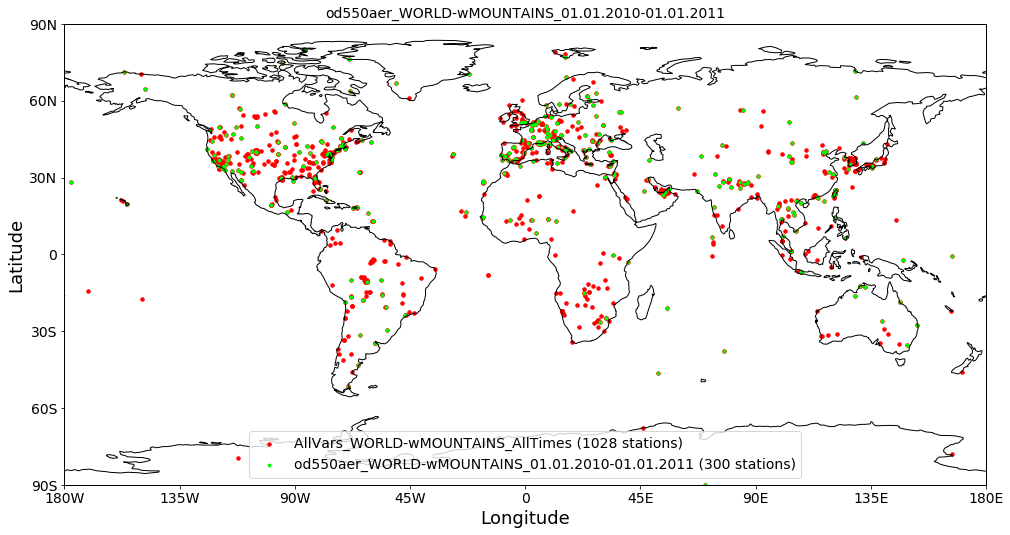

In [11]:
# plots all stations as red dots
ax = data.plot_station_coordinates(markersize=12, color='r')

# add all stations that contain AOD data in 2010 in green
ax = data.plot_station_coordinates(var_name='od550aer', 
                                   start=2010, 
                                   stop=2011, color='lime', ax=ax)

As you can see, you can specify additional input parameters, e.g. to display only stations that contain variable data or to specify a time interval.

In any case, it is always good to know about the help function:

In [12]:
help(data.plot_station_coordinates)

Help on method plot_station_coordinates in module pyaerocom.ungriddeddata:

plot_station_coordinates(var_name=None, filter_name=None, start=None, stop=None, ts_type=None, color='r', marker='o', markersize=8, fontsize_base=10, **kwargs) method of pyaerocom.ungriddeddata.UngriddedData instance
    Plot station coordinates on a map
    
    All input parameters are optional and may be used to add constraints 
    related to which stations are plotted. Default is all stations of all 
    times.
    
    Parameters
    ----------
    
    var_name : :obj:`str`, optional
        name of variable to be retrieved
    filter_name : :obj:`str`, optional
        name of filter (e.g. EUROPE-noMOUNTAINS)
    start 
        start time (optional)
    stop 
        stop time (optional). If start time is provided and stop time not, 
        then only the corresponding year inferred from start time will be 
        considered
    ts_type : :obj:`str`, optional
        temporal resolution
    color : str

#### Access individual station data 

Individual station data (i.e. time series of one or more variables + metadata) can be accessed using the method

**[UngriddedData.to_station_data](https://pyaerocom.met.no/api.html?highlight=to_station_data#pyaerocom.ungriddeddata.UngriddedData.to_station_data)**

To specify a dataset (or a station) you can either use the metadata index of the corresponding data file (`meta_idx=9`, for 10th file) *or* you can specify the station name or a wildcard specifying the station name. 

The method returns a [pyaerocom.StationData](https://pyaerocom.met.no/api.html?highlight=stationdata#pyaerocom.stationdata.StationData) object, which is a dictionary-like object which contains data vectors and time-stamps as well as metadata.

Let's go for the station of Granada:

In [13]:
STATION_NAME = 'Granada'

In [14]:
station_data = data.to_station_data(meta_idx=STATION_NAME, insert_nans=True)
print(station_data)


Pyaerocom StationData
---------------------
var_info (BrowseDict([('od550aer', OrderedDict([('unit', '1'), ('overlap', False), ('ts_type', 'daily')]))]))
   od550aer (<class 'collections.OrderedDict'>)
    unit: 1
    overlap: False
    ts_type: daily
station_coords ({'latitude': 37.164, 'longitude': -3.605, 'altitude': 680.0})
   latitude: 37.164
   longitude: -3.605
   altitude: 680.0
data_err (BrowseDict([('od550aer', array([nan, nan, nan, ..., nan, nan, nan]))]))
   od550aer (array, 2597 items)
   [nan
    nan
    ...
    nan
    nan]

overlap: 
filename: None
station_id: None
station_name: Granada
instrument_name: sun_photometer
PI: Lucas_Alados_Arboledas
country: None
ts_type: daily
latitude: 37.164
longitude: -3.605
altitude: 680.0
data_id: AeronetSunV2Lev2.daily
dataset_name: None
data_product: None
data_version: None
data_level: None
revision_date: None
ts_type_src: daily
stat_merge_pref_attr: None
data_revision: 20180519

Data arrays
.................
dtime (array, 4227 item

You can see that the *StationData* object contains both metadata and data vectors. All attributes can be accessed either using dictionary style access, e.g.:

In [15]:
station_data['station_name']

'Granada'

Alternatively, you can also use the '.' operator, e.g.:

In [16]:
station_data.station_name

'Granada'

Time-series data is represented as `pandas.Series` and the data is stored in the object using the AeroCom variable name:

In [17]:
station_data.od550aer.head()

2004-12-29    0.018218
2004-12-30    0.052588
2004-12-31    0.056740
2005-01-01    0.049267
2005-01-02    0.039105
Freq: D, dtype: float64

#### Plotting of timeseries data directly from [StationData](https://pyaerocom.met.no/api.html?highlight=stationdata#pyaerocom.stationdata.StationData) class

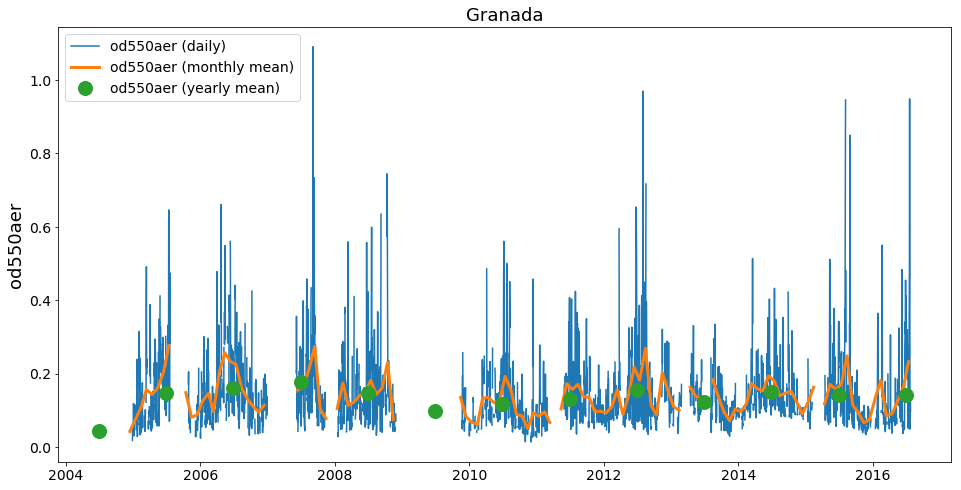

In [18]:
ax = station_data.plot_timeseries('od550aer')
ax = station_data.plot_timeseries('od550aer', freq='monthly', lw=3, ax=ax)
station_data.plot_timeseries('od550aer', freq='yearly', ls='none', marker='o', ms=14, ax=ax);

The resampling of the timeseries in the plotting method is done automatically (if input `ts_type` is provided). 

**TODO**:From the timeseries plot above, you might have noted that the very first yearly datapoint (2004) is comparatively low. You might investigate below why this is the case.

#### Working with the timeseries data

As mentioned above, data and metadata attributes can be accessed simply using `[ ]` or `.` operators. E.g.:

In [19]:
od550aer = station_data.od550aer
od550aer.head()

2004-12-29    0.018218
2004-12-30    0.052588
2004-12-31    0.056740
2005-01-01    0.049267
2005-01-02    0.039105
Freq: D, dtype: float64

Apart from that, the `StationData` object contains some further methods that may be used to further manipulate and / or visualise the data. Above, the `plot_timeseries` method was shown as an example. We used some input options to downsample the timeseries to different temporal resolutions. This can be done using the following method:

In [20]:
? station_data.resample_timeseries

In [21]:
od550aer_monthly = station_data.resample_timeseries('od550aer', 'monthly')
od550aer_monthly.head()

2004-12-15    0.042515
2005-01-15    0.076335
2005-02-15    0.109146
2005-03-15    0.156891
2005-04-15    0.142934
dtype: float64

## Part 2: Your turn

Based on the example above, you have now several options to continue on your own. Here are some suggestions:

1. Repeat all steps above using Aeronet Sun ***v3*** level 2 daily data (instead of ***v2***).

    - Find the corresponding ID for the version 3 product (e.g. using method *browse_database*).
    - Read the v3 database into *UngriddedData* object using the *ReadUngridded* class.
    - Extract Granada as example time series.
    - Compare both datasets (e.g. [create a scatter plot](https://pyaerocom.met.no/api.html#pyaerocom.plot.plotscatter.plotscatter) or compute [correlation coefficient, bias, etc.](https://pyaerocom.met.no/api.html?highlight=statistics#pyaerocom.mathutils.calc_statistics)).  
    

2. **EXTRA TASK**: compute the AOD trends for both timeseries (Aeronet v2 and v3 AODs).
    
    - You may want to apply some prefiltering before computing the trend.
    - To compute the trend, check out the [scipy.theilslopes](https://docs.scipy.org/doc/scipy-0.17.1/reference/generated/scipy.stats.theilslopes.html) method which we also use in the [Aerosol trends interface](https://aerocom-trends.met.no/#).
    - How does the theilslopes trend compare with a slope retrieved using normal linear regression?
    - Does it make a difference if you compute the trend from different temporal resolutions?
    - Any other idea how to compute the trend of this highly seasonal timeseries? [Here is some inspiration](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/).
